# Sistema de predición del indice de contaminación en el aire en Colombia.

La IA puede predecir la calidad del aire.

Parametros:
Componentes en el aire `(NO2 y PM2.5)` en el departamento de Antioquia.

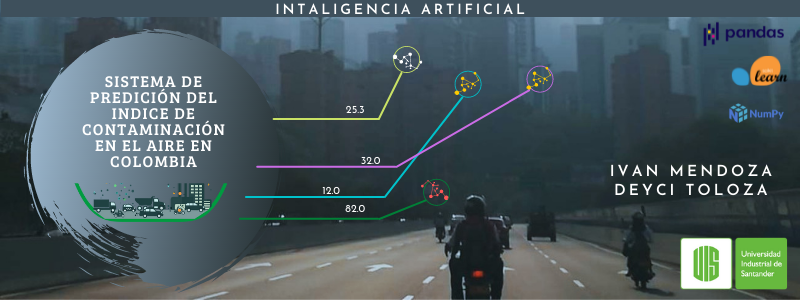

In [1]:
#@title Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#@title Montar Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#@title Cargar Dataset.
#Ubicación: Antioquia. Rango toma de los datos: 29-04-2021 a 31-01-2022
data = pd.read_csv('/content/drive/MyDrive/Proyecto-IA/data_21429_22131.csv')
data.shape

(90345, 11)

In [4]:
#@title Cantidad de registros en la ciudad de medellin por cada componente
print('no2: '+str(data[data["parameter"].str.contains('no2')].shape[0]), 'co: '+str(data[data["parameter"].str.contains('co')].shape[0]), 'pm25: '+str(data[data["parameter"].str.contains('pm25')].shape[0]))


no2: 25298 co: 10370 pm25: 54677


In [5]:
#@title Antioquia, 29-04-2021 a 31-01-2022
data=data.sort_values('local',ascending=True)
data.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
90344,10797,CEN-TRAF - Estación Tráfico Centro,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,21.000000,µg/m³,6.252561,-75.569580
90322,10641,"MED-UNNV - Medellín, centro occidente - Unive...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,no2,-9999.000000,ppm,6.263370,-75.577004
90323,10493,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,co,-9999.000000,ppm,6.378433,-75.451141
90324,10708,MED-ITMR - Institucion Universitaria ITM Robledo,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,no2,0.027437,ppm,6.275564,-75.588287
90325,10641,"MED-UNNV - Medellín, centro occidente - Unive...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,-9999.000000,µg/m³,6.263370,-75.577004


In [6]:
#@title cual es el lugar que tiene mas registros en Atioquia.
Id=data['locationId'].unique()
x=[]
for i in Id:
  x.append(data[data['locationId']==i].shape[0])

print("Equipo(locationId) que tiene mas registros en Antioquia es: ",Id[x.index(max(x))],"con ",max(x),"datos.")

Equipo(locationId) que tiene mas registros en Antioquia es:  10683 con  10504 datos.


Ubicación del codigo 10683. `592F+W2C Sabaneta, Antioquia`

In [7]:
#@title datos del lugar con mas registros en medellin
print(data[data['locationId']==Id[x.index(max(x))]].shape)
data=data[data['locationId']==Id[x.index(max(x))]]
data.head(8)

(10504, 11)


,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
90329,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,no2,-9999.0,ppm,6.152313,-75.627487
90332,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,co,-9999.0,ppm,6.152313,-75.627487
90337,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,6.0,µg/m³,6.152313,-75.627487
90301,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T03:00:00+00:00,2021-04-29T02:00:00-01:00,co,-9999.0,ppm,6.152313,-75.627487
90302,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T03:00:00+00:00,2021-04-29T02:00:00-01:00,pm25,9.0,µg/m³,6.152313,-75.627487
90306,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T03:00:00+00:00,2021-04-29T02:00:00-01:00,no2,-9999.0,ppm,6.152313,-75.627487
90277,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T04:00:00+00:00,2021-04-29T03:00:00-01:00,co,-9999.0,ppm,6.152313,-75.627487
90281,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T04:00:00+00:00,2021-04-29T03:00:00-01:00,pm25,13.0,µg/m³,6.152313,-75.627487


In [8]:
#@title inserte el agente contaminante
parametro = "pm25" #@param {type:"string"}


In [9]:
#@title numero de datos del agente contaminante
print(data[data['parameter']==parametro].shape)
final=pd.DataFrame(data[data['parameter']==parametro])


(4456, 11)


#Limpieza del dataset (Análisis)

---
<h3>Aqui descartamos las columnas que no necesitamos, se ajusta el formato de las fechas y horas (UTC) y se prepara el dataset para analizar. </h3>

---






In [10]:
#@title datos que deben ser cambiados para la disminucion de ruido
final[final['value']<0].value.unique()

array([-9999.])

In [11]:
#@title cambio de valores de -9999 a la media de los datos
final = final.replace(final[final['value']<0].value.unique(), np.mean(final[final.value>0].value))

In [12]:
#@title dataset que se trabajará
final.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
90337,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,6.0,µg/m³,6.152313,-75.627487
90302,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T03:00:00+00:00,2021-04-29T02:00:00-01:00,pm25,9.0,µg/m³,6.152313,-75.627487
90281,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T04:00:00+00:00,2021-04-29T03:00:00-01:00,pm25,13.0,µg/m³,6.152313,-75.627487
90259,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T05:00:00+00:00,2021-04-29T04:00:00-01:00,pm25,21.0,µg/m³,6.152313,-75.627487
90236,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T06:00:00+00:00,2021-04-29T05:00:00-01:00,pm25,22.0,µg/m³,6.152313,-75.627487


In [13]:
#@title se verifica que los datos se cambiaron correctamente
final[final['value']<0].value.unique()

array([], dtype=float64)

In [14]:
#@title se borran las columnas que no seran necesarias
final.drop(['locationId','location','city','country', 'local', 'parameter', 'unit', 'latitude','longitude'], axis = 'columns', inplace=True)

In [15]:
#@title se resetean los indices para que queden ordenados
final.reset_index(inplace=True, drop=True)

In [16]:
#@title Columnas con fecha y hora del registro.
#Creamos un par de columnas que guarde la fecha y la hora de los datos.
final['Fecha']=final['utc'].map(lambda x:x.split('T')[0])
final['horas']=final['utc'].map(lambda x:x.split('T')[1])
final['Hora']=final['horas'].map(lambda x:x.split('+')[0])
final['res']=final['horas'].map(lambda x:x.split('+')[1])
final.drop(['utc','res','horas'], axis = 'columns', inplace=True)

In [17]:
#@title se ordena el dataset
print(final.shape)
final.sort_values('Fecha',ascending=False).head(10)

(4456, 3)


,value,Fecha,Hora
4455,22.0,2022-01-31,05:00:00
4454,20.0,2022-01-31,04:00:00
4453,21.0,2022-01-31,03:00:00
4452,17.0,2022-01-31,02:00:00
4451,16.0,2022-01-31,01:00:00
4450,16.0,2022-01-31,00:00:00
4431,22.0,2022-01-30,05:00:00
4436,18.0,2022-01-30,10:00:00
4434,16.0,2022-01-30,08:00:00
4433,20.0,2022-01-30,07:00:00


In [18]:
#@title Guardar dataset con fechas
o=pd.DataFrame(final)

#se cambian los valores de Fecha

In [19]:
x=final.Fecha.unique()

In [20]:
n=0
for i in range(final.shape[0]):
  if n==x.shape[0]:
    continue
  if(final.iloc[i].Fecha==x[n]):
    final.replace(final.iloc[i].Fecha,n,inplace=True)
    n=n+1

In [21]:
final[19:30]

,value,Fecha,Hora
19,9.0,0,21:00:00
20,15.0,0,22:00:00
21,22.0,0,23:00:00
22,23.0,1,00:00:00
23,9.0,1,01:00:00
24,11.0,1,02:00:00
25,20.0,1,03:00:00
26,20.0,1,04:00:00
27,16.0,1,05:00:00
28,21.0,1,06:00:00


In [22]:
final.iloc[4446:4457]

,value,Fecha,Hora
4446,11.0,192,20:00:00
4447,14.0,192,21:00:00
4448,12.0,192,22:00:00
4449,13.0,192,23:00:00
4450,16.0,193,00:00:00
4451,16.0,193,01:00:00
4452,17.0,193,02:00:00
4453,21.0,193,03:00:00
4454,20.0,193,04:00:00
4455,22.0,193,05:00:00


In [23]:
y=final.Fecha.unique()
y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
dicfecha=dict(zip(x, y))

In [25]:
#@title se cambian los valores de Hora a enteros
final["Hora"]=final["Hora"].map(lambda x:x.split(':')[0]).astype(int)

In [26]:
print(final.dtypes)
print(final.shape)
final.head()

value    float64
Fecha      int64
Hora       int64
dtype: object
(4456, 3)


,value,Fecha,Hora
0,6.0,0,2
1,9.0,0,3
2,13.0,0,4
3,21.0,0,5
4,22.0,0,6


# graficas en 3D de los datos

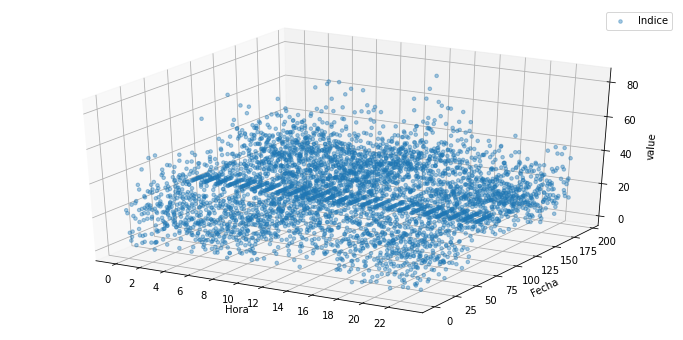

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mb_synth_ns = final
m = "."
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(mb_synth_ns["Hora"], mb_synth_ns["Fecha"], mb_synth_ns["value"], marker=m, alpha=.4, s=50, label="Indice")
ax.set_xlabel('Hora')
ax.set_ylabel('Fecha')
ax.set_zlabel('value')
ax.legend()
plt.xticks(range(0,23,2))
plt.show()

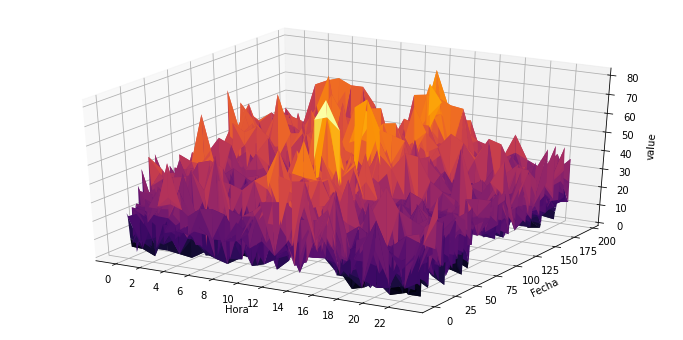

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import os
mb_synth_ns = final
m = "."
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(mb_synth_ns["Hora"], mb_synth_ns["Fecha"], mb_synth_ns["value"], cmap = 'inferno')
ax.set_xlabel('Hora')
ax.set_ylabel('Fecha')
ax.set_zlabel('value')
plt.xticks(range(0,23,2))
plt.show()

#Descomposición

In [29]:
#@title uso de PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(final[["Fecha","Hora"]])
fn=pd.DataFrame(data=principalComponents,columns=['x'])
fn["y"]=final["value"]

In [30]:
fn

,x,y
0,96.901629,6.0
1,96.902344,9.0
2,96.903058,13.0
3,96.903773,21.0
4,96.904487,22.0
...,...,...
4451,-96.099036,16.0
4452,-96.098322,17.0
4453,-96.097607,21.0
4454,-96.096893,20.0


In [31]:
#@title Entrenamiento con Decision Tree Regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
np.random.seed(21)
X = fn["x"].values.reshape(-1,1)
y = fn["y"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
#@title Valoración de la precisión del Regresor DTR (Errores)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data  83.911
RMSE depth split data  9.160
MAE depth split data  6.539


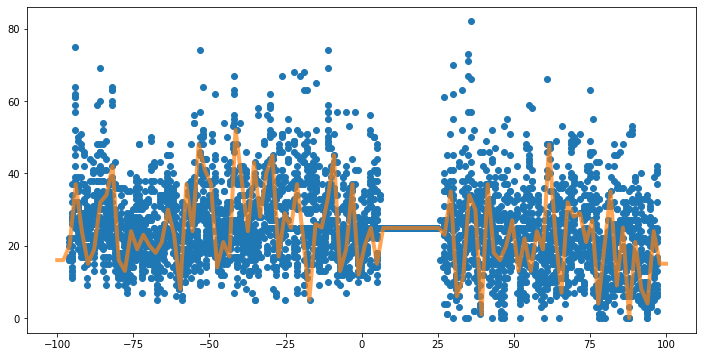

In [33]:
#@title Plot Regressor DTR
plt.figure(figsize=(12,6))
plt.plot(fn['x'], fn['y'], 'o', label='observation')
xx = np.array([np.linspace(-100, 100, 100)]).T
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')

In [34]:
#@title Explicación de la continuidad entre cerca de 0 a 25 en x.
#Explicación de la continuidad entre cerca de 0 a 25 en x. Es porque los valores -9999.0 del dataset de pm25 fueron cambiados a la media de los datos normales(los mayores a 0 en y)
fn[fn.x>0][fn.x<25].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,x,y
1642,24.913079,24.901333
1643,24.913793,24.901333
1644,24.914508,24.901333
1645,24.915222,24.901333
1646,24.915937,24.901333
1647,24.916651,24.901333
1648,23.900219,24.901333
1649,23.900933,24.901333
1650,23.901648,24.901333
1651,23.902362,24.901333


In [35]:
#@title Entrenamiento con Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(21)
X = fn["x"].values.reshape(-1,1)
y = fn["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
#@title Valoración de la precisión del Regresor RFR (Errores)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data  67.175
RMSE depth split data  8.196
MAE depth split data  5.816


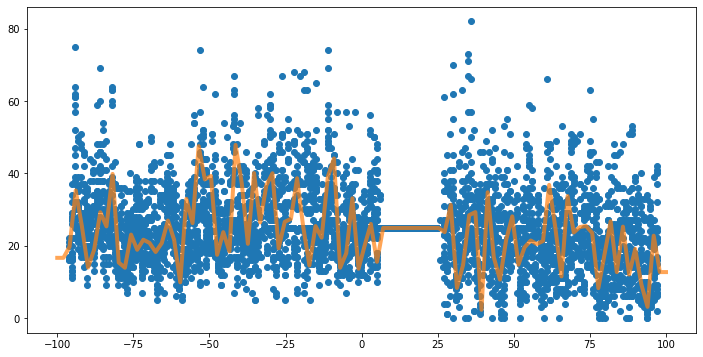

In [37]:
#@title Plot Regressor RFR
plt.figure(figsize=(12,6))
plt.plot(fn['x'], fn['y'], 'o', label='observation')
xx = np.array([np.linspace(-100, 100, 100)]).T
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')

In [38]:
#@title Muestra
#variable aleatoria
k=np.random.randint(0, len(X_test))
#El valor k se le asigna a la porción de testeo, para sacar una muestra aleatoria.
testValor=X_test[k]
print(testValor)

[-10.0983435]


In [39]:
#@title Valor predicho de la muestra.
regressor.predict(testValor.reshape(1,-1))

array([34.58])

In [40]:
fn[fn["x"]==testValor[0]]

,x,y
2429,-10.098344,41.0


In [41]:
#@title GroundTruth de la muestra.
o.iloc[2429]

value          41.0
Fecha    2021-09-08
Hora       02:00:00
Name: 2429, dtype: object

In [42]:
#@title SVM (Regressor) 'linear', 'poly', 'rbf'
kernel = "rbf" #@param {type:"string"}
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
np.random.seed(21)
X = fn["x"].values.reshape(-1,1)
y = fn["y"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, shuffle=True)
scores = []
regressor = SVR(kernel=kernel)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, pred)
scores.append(mse)

In [43]:
#@title Valoración de la precisión del Regresor SVM (Errores)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data  120.159
RMSE depth split data  10.962
MAE depth split data  7.987


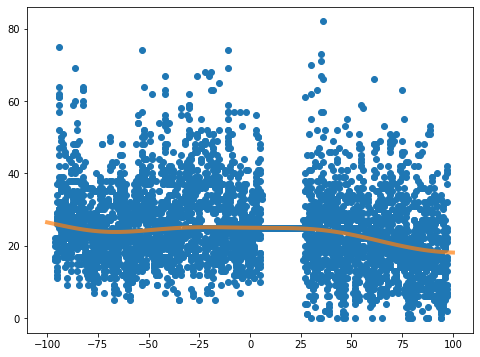

In [44]:
#@title Plot Regressor SVM
plt.figure(figsize=(8,6))
plt.plot(fn['x'], fn['y'], 'o', label='observation')
xx = np.array([np.linspace(-100, 100, 100)]).T
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')

In [45]:
#@title Red neuronal
import keras 
import keras.backend as kb
import tensorflow as tf
from sklearn.model_selection import train_test_split
tf.random.set_seed(21)
np.random.seed(21)
X = fn["x"].values.reshape(-1,1)
y = fn["y"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation=tf.nn.relu, input_shape= (X_train[0].shape)),
    tf.keras.layers.Dense(7, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error'])

Valores menores de aprendizaje, requiere mas epochs, ya que se hacen cambios mas pequeños en los pesos, en cada actualización.

In [ ]:
history = model.fit(X_train,y_train,epochs=100,verbose=False,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)

In [ ]:
#@title Plot del entrenamiento
plt.plot(history.history['mean_absolute_error'], label='Train ')
plt.plot(history.history['val_mean_absolute_error'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend()